In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
import numpy as np


In [ ]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [ ]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
material_costs = pd.DataFrame({
    'material':['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered'],
    'prices':[2750,3250,750,4400,4550,3120,5000,2500,12000,12000]

})
material_costs


,material,prices
0,has_superstructure_adobe_mud,2750
1,has_superstructure_mud_mortar_stone,3250
2,has_superstructure_stone_flag,750
3,has_superstructure_cement_mortar_stone,4400
4,has_superstructure_mud_mortar_brick,4550
5,has_superstructure_cement_mortar_brick,3120
6,has_superstructure_timber,5000
7,has_superstructure_bamboo,2500
8,has_superstructure_rc_non_engineered,12000
9,has_superstructure_rc_engineered,12000


In [ ]:
df_train = train_values.merge(train_labels, how='inner')
df_train.groupby('damage_grade').agg('count')

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,
1,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,...,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124
2,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,...,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259
3,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,...,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218


In [ ]:
cost_by_floor = []
materials = list(df_train.iloc[:,15:25].columns)
cost_material_dict = material_costs.set_index('material').to_dict()['prices']

for i in range(260601):
    cost = 0
    for material in materials:
        if df_train[material][i]:
            cost += cost_material_dict[material]
    cost_by_floor.append(cost)

df_train['cost_by_floor'] = cost_by_floor
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,asd,cost_by_floor,cost_by_building
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,3,0,6000,12000
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,2,1,3250,6500
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,3,2,3250,6500
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,2,3,10750,21500
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,3,4,2750,8250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,2,260596,3250,3250
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,3,260597,3250,6500
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,3,260598,3250,9750
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,2,260599,3120,6240


In [ ]:
df_train['cost_by_building'] = df_train['cost_by_floor']*df_train['count_floors_pre_eq']


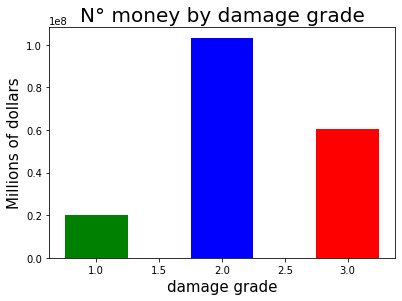

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])

x_axis = list(df_train['damage_grade'].drop_duplicates())
y_axis = list(df_train.loc[df_train['has_secondary_use_hotel'] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])

ax.bar(x_axis,y_axis, width = 0.5, color = ['red','blue','green'])
ax.set_xlabel('damage grade', size = 15)
ax.set_ylabel('Millions of dollars', size = 15)
#scale_y = 1e6
#ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#ax.yaxis.set_major_formatter(ticks_y)
ax.set_title('N° money by damage grade', size = 20)

plt.show()

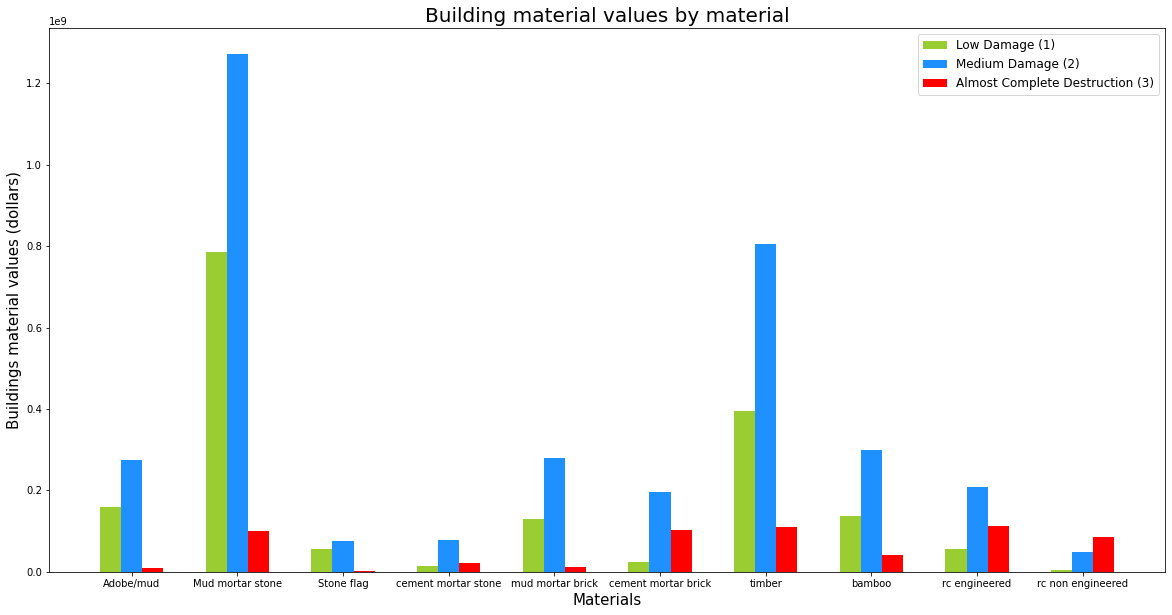

In [ ]:
results = [[],[],[]]
for material in materials:
    results[0].append(list(df_train.loc[df_train[material] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[2])
    results[1].append(list(df_train.loc[df_train[material] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[1])
    results[2].append(list(df_train.loc[df_train[material] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[0])

results

X = ['Adobe/mud','Mud mortar stone','Stone flag','cement mortar stone','mud mortar brick','cement mortar brick','timber','bamboo','rc engineered','rc non engineered']

damage_1 = results[0]
damage_2 = results[1]
damage_3 = results[2]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, damage_1, 0.2, label = 'Low Damage (1)', color = 'yellowgreen')
plt.bar(X_axis + 0, damage_2, 0.2, label = 'Medium Damage (2)', color = 'dodgerblue')
plt.bar(X_axis + 0.2, damage_3, 0.2, label = 'Almost Complete Destruction (3)', color = 'r')

plt.xticks(X_axis, X)
plt.xlabel("Materials", size = 15)
plt.ylabel("Buildings material values (dollars)", size = 15)
plt.title("Building material values by material", size = 20)
plt.legend(fontsize = 12)

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)



fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 10)
fig.savefig('test2png.png', dpi=100)

plt.show()

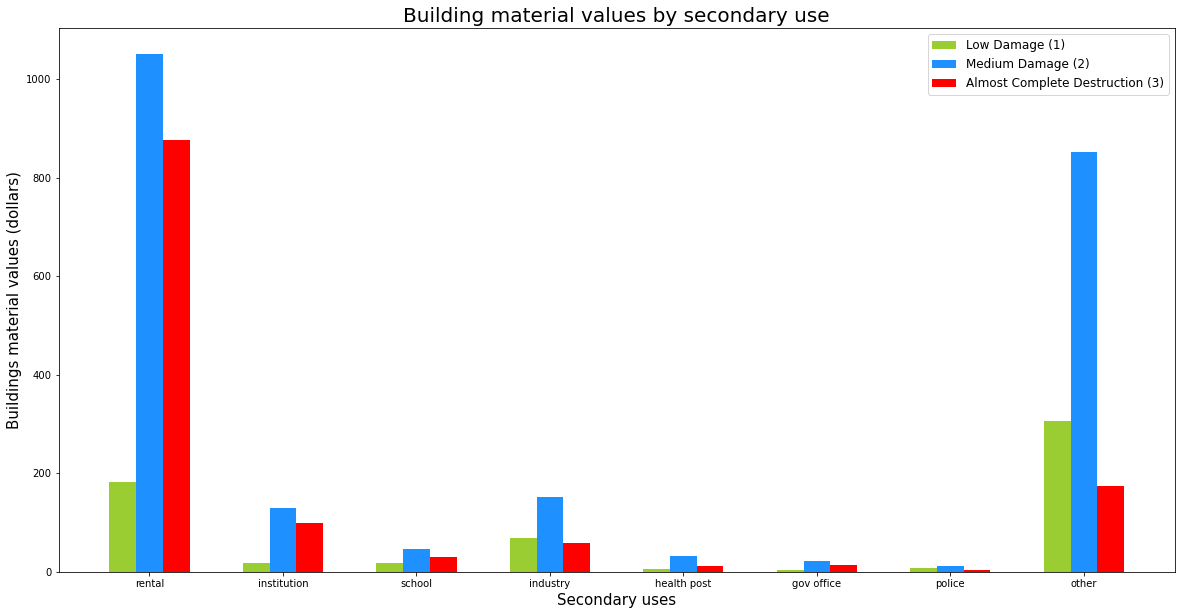

In [ ]:
secondary_uses = list(df_train.iloc[:,31:39].columns)

results = [[],[],[]]
for sec_use in secondary_uses:
    results[0].append(list(df_train.loc[df_train[sec_use] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('count')['cost_by_building'])[2])
    results[1].append(list(df_train.loc[df_train[sec_use] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('count')['cost_by_building'])[1])
    results[2].append(list(df_train.loc[df_train[sec_use] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('count')['cost_by_building'])[0])

X = ['rental','institution','school','industry','health post','gov office','police','other']
#'agriculture','hotel'
damage_1 = results[0]
damage_2 = results[1]
damage_3 = results[2]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, damage_1, 0.2, label = 'Low Damage (1)', color = 'yellowgreen')
plt.bar(X_axis + 0, damage_2, 0.2, label = 'Medium Damage (2)', color = 'dodgerblue')
plt.bar(X_axis + 0.2, damage_3, 0.2, label = 'Almost Complete Destruction (3)', color = 'r')

plt.xticks(X_axis, X)
plt.xlabel("Secondary uses", size = 15)
plt.ylabel("Buildings material values (dollars)", size = 15)
plt.title("Building material values by secondary use", size = 20)
plt.legend(fontsize = 12)

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)



fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 10)
fig.savefig('test2png.png', dpi=100)

plt.show()